In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/drive/MyDrive/Kaggle/'
%cd '/content/drive/MyDrive/Kaggle/'

!kaggle datasets download -d samaneheslamifar/facial-emotion-expressions
!unzip \*.zip && rm *.zip


In [57]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
torch.cuda.is_available()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/Kaggle/'

train_path='/content/drive/MyDrive/Kaggle/images/train'
validation_path='/content/drive/MyDrive/Kaggle/images/validation'



t=transforms.Compose([transforms.RandomRotation(10),transforms.ToTensor()])
train_dataset=torchvision.datasets.ImageFolder(root=train_path,transform=t)
validation_dataset=torchvision.datasets.ImageFolder(root=validation_path,transform=t)
classes = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')



Using device: cpu


In [58]:
def random4(dataset):
  return [dataset[np.random.randint(len(dataset))] for x in range(4)]
def display(image,label,classes):
  plt.figure(figsize=(9,9))
  plt.subplot(1,4,1)
  plt.imshow(image[0].permute(1, 2, 0))
  plt.title(classes[label[0]])
  plt.subplot(1,4,2)
  plt.imshow(image[1].permute(1, 2, 0))
  plt.title(classes[label[1]])
  plt.subplot(1,4,3)
  plt.imshow(image[2].permute(1, 2, 0))
  plt.title(classes[label[2]])
  plt.subplot(1,4,4)
  plt.imshow(image[3].permute(1, 2, 0))
  plt.title(classes[label[3]])
def lossgraph(list_loss):
  if isinstance(list_loss,tuple):
    for i in list_loss:
      x=range(len(i))
      y=i
      plt.plot(x,y,marker ='.')
      plt.legend(["train loss", "test loss"])
  else:
    x=range(len(list_loss))
    y=list_loss
    plt.plot(x,y,marker ='.')
    plt.show()

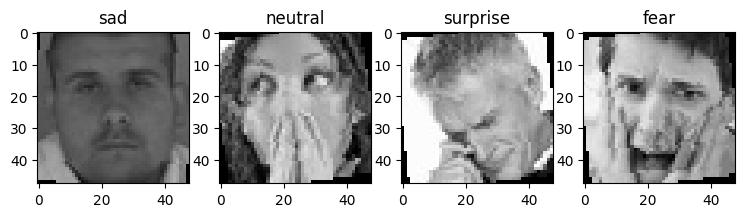

In [59]:
b=random4(validation_dataset)
image=[b[x][0] for x in range(len(b))]
label=[b[x][1]for x in range(len(b))]
display(image,label,classes)

In [60]:
import torch.nn as nn
import torch.nn.functional as F

#network architecture

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3)
        self.conv2 = nn.Conv2d(32, 32, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(32, 32, 3)
        self.conv4 = nn.Conv2d(32,64 , 3)
        self.conv5 = nn.Conv2d(64, 128, 3)
        self.conv6 = nn.Conv2d(128, 128, 3)
        self.fc1 = nn.Linear(128,64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 7)

    def forward(self, x):
        x =F.relu(self.conv1(x)) 
        x = F.relu(self.pool(self.conv2(x)))
        x =F.relu(self.conv3(x)) 
        x = F.relu(self.pool(self.conv4(x)))
        x = F.relu(self.pool(self.conv5(x)))
        x = F.relu(self.conv6(x))
        x = torch.flatten(x, 1) 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x


net = Net()

In [61]:
batch_size=64
trainloader=torch.utils.data.DataLoader(train_dataset,batch_size=batch_size,shuffle=True)
testloader=torch.utils.data.DataLoader(validation_dataset,batch_size=batch_size,shuffle=True)

import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


In [62]:
train_loss_epoch=[]
test_loss_epoch=[]
epochs=30
for epoch in range(epochs):  #no. of epochs
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
    train_loss=running_loss / len(trainloader)
    train_loss_epoch.append(train_loss)
    
    running_loss = 0.0
    for i, data in enumerate(testloader, 0):
        inputs, labels = data
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        running_loss += loss.item()
        
    test_loss = running_loss / len(testloader)
    test_loss_epoch.append(test_loss)
    
    print(f'epoch {epoch+1} train loss: {train_loss:.6f} test loss: {test_loss:.6f} ')

            
print('Finished Training')

epoch 1 train loss: 1.885966 test loss: 1.846238 
epoch 2 train loss: 1.835319 test loss: 1.823201 
epoch 3 train loss: 1.821343 test loss: 1.815451 
epoch 4 train loss: 1.816147 test loss: 1.811871 
epoch 5 train loss: 1.813314 test loss: 1.810158 
epoch 6 train loss: 1.812136 test loss: 1.810173 
epoch 7 train loss: 1.811387 test loss: 1.809759 
epoch 8 train loss: 1.811248 test loss: 1.808711 
epoch 9 train loss: 1.811163 test loss: 1.809316 
epoch 10 train loss: 1.810989 test loss: 1.808524 
epoch 11 train loss: 1.810866 test loss: 1.808632 
epoch 12 train loss: 1.810780 test loss: 1.808733 
epoch 13 train loss: 1.810857 test loss: 1.808898 
epoch 14 train loss: 1.810835 test loss: 1.808694 
epoch 15 train loss: 1.810983 test loss: 1.809102 
epoch 16 train loss: 1.810698 test loss: 1.808866 
epoch 17 train loss: 1.810715 test loss: 1.808644 
epoch 18 train loss: 1.810878 test loss: 1.809739 
epoch 19 train loss: 1.810803 test loss: 1.808671 
epoch 20 train loss: 1.810635 test loss:

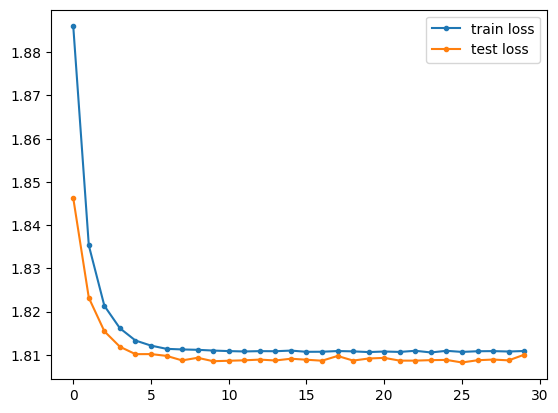

In [63]:
lossgraph((train_loss_epoch,test_loss_epoch))

In [64]:
test_correct = 0.0
test_total = 0.0
with torch.no_grad():
    for inputs, labels in testloader:
        outputs = net(inputs)
        _, predicted = torch.max(outputs, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

test_accuracy = 100.0 * test_correct / test_total
print(f'Test Accuracy: {test_accuracy:.2f}')

Test Accuracy: 25.83
